# Data cleaning project
*** --> German ebay car listings (eBay Kleinanzeigen) ***


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
autos = pd.read_csv('autos.csv',encoding='Latin-1')

In [3]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

Take care of:
- null values
- strings that should represent integers or floats
- column names: use snake_case instead of camelCase

In [5]:
# Fix column names

col = autos.columns
col_fixed = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_PS', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen']
autos.columns = col_fixed

autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [6]:
# Get some descriptive statistics of the dataset

autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-11 22:38:16,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


In [7]:
# fix price data (remove $ and ,)

autos['price'] = autos['price'].str.replace('$','')
autos['price'] = autos['price'].str.replace(',','')
autos['price'] = autos['price'].astype(int)

autos['price'].describe()



count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [8]:
# fix odometer data (remove km and ,) and rename column

autos['odometer'] = autos['odometer'].str.replace(',','')
autos['odometer'] = autos['odometer'].str.replace('km','')
autos['odometer'] = autos['odometer'].astype(int)

autos.rename(columns={'odometer':'odometer_km'},inplace=True)

autos['odometer_km'].describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [9]:
# Outlier removal - price

avg = autos['price'].mean()
sd = autos['price'].std()

outlier_l = 500
outlier_h = avg + 3*sd

print('Records w/ outliers: {} '.format(len(autos)))

autos = autos[autos['price'].between(outlier_l,outlier_h)]

print('Records w/o outliers: {}'.format(len(autos)))

Records w/ outliers: 50000 
Records w/o outliers: 45102


In [10]:
# Validate odometer data

autos['odometer_km'].value_counts().sort_index()

# looks good

5000        616
10000       237
20000       727
30000       765
40000       808
50000       997
60000      1131
70000      1189
80000      1385
90000      1676
100000     2031
125000     4839
150000    28701
Name: odometer_km, dtype: int64

In [11]:
# Explore date columns (ad_created vs_last seen)

ad_created = autos['ad_created'].str.split().str[0]
last_seen = autos['last_seen'].str.split().str[0]

#concat series

dates = pd.concat([ad_created,last_seen],axis=1)
dates.head()

dates['ad_created'] = pd.to_datetime(dates['ad_created'])
dates['last_seen']  = pd.to_datetime(dates['last_seen'])

dates['diff'] = dates['last_seen'] - dates['ad_created']
dates.sort_values('diff',ascending=False).head()

dates['diff'].describe()

count                     45102
mean     9 days 00:19:57.286151
std      8 days 19:26:55.378239
min             0 days 00:00:00
25%             2 days 00:00:00
50%             6 days 00:00:00
75%            14 days 00:00:00
max           300 days 00:00:00
Name: diff, dtype: object

In [12]:
# Which car has been on the listing page for longer time

dates.sort_values('diff',ascending = False).head()

,ad_created,last_seen,diff
22781,2015-06-11,2016-04-06,300 days
20649,2015-08-10,2016-04-05,239 days
34883,2015-09-09,2016-04-05,209 days
2243,2015-11-10,2016-04-07,149 days
27986,2015-12-05,2016-03-23,109 days


In [13]:
i = dates['diff'].idxmax()
autos.loc[i]

date_crawled                                        2016-03-23 01:48:59
name                  Mercedes_Benz_C220_BT__7G_Tronic_AMG__Modellja...
seller                                                           privat
offer_type                                                      Angebot
price                                                             47900
abtest                                                             test
vehicle_type                                                  limousine
registration_year                                                  2014
gearbox                                                       automatik
power_PS                                                              0
model                                                          c_klasse
odometer_km                                                       20000
registration_month                                                    2
fuel_type                                                       

In [14]:
# Investigate registration date

older = autos['registration_year'].sort_values().head(20)
recent = autos['registration_year'].sort_values().tail(20)

older.reset_index(drop=True,inplace=True)
recent.reset_index(drop=True,inplace=True)
registration = pd.concat([older,recent],axis=1)
registration.columns = ['older','recent']
registration

,older,recent
0,1000,2018
1,1001,2018
2,1910,2018
3,1910,2018
4,1927,2018
5,1929,2018
6,1931,2019
7,1934,2800
8,1934,4100
9,1937,4500


In [15]:
# Eliminate very old and future registrations (consider 1960 to 2016)

print('Nr of records: {}'.format(len(autos)))

autos = autos[autos['registration_year'].between(1960,2016)]

print('Nr of records after fake registrations: {}'.format(len(autos)))

Nr of records: 45102
Nr of records after fake registrations: 43286


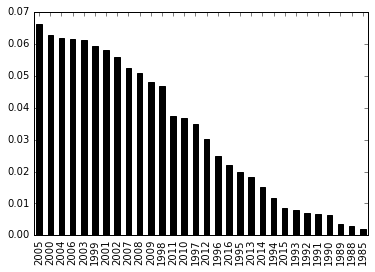

In [16]:
# Distribution of valid registrations

autos['registration_year'].value_counts(normalize=True).head(30).plot(kind='bar', color = 'black')

In [17]:
# Analysis by brand - average price

brands = autos['brand'].unique()

#via dicts
brands_avg_price = {}

for brand in brands:
    avg_price = autos.loc[autos['brand'] == brand,'price'].mean()
    brands_avg_price[brand] = round(avg_price,0)

print(sorted(brands_avg_price.items(),key = lambda x:x[1],reverse=True)[:5])

#via pandas
print('\n')
print(autos.groupby('brand')['price'].mean().sort_values(ascending = False).head(5).round())

[('porsche', 46955.0), ('land_rover', 19042.0), ('sonstige_autos', 16657.0), ('jaguar', 12130.0), ('jeep', 11650.0)]


brand
porsche           46955.0
land_rover        19042.0
sonstige_autos    16657.0
jaguar            12130.0
jeep              11650.0
Name: price, dtype: float64


In [18]:
# Analysis of the price and mileage of most frequent brands

top_6_brands = autos['brand'].value_counts().sort_values(ascending=False).head(6).index

mean_price = {}
mean_mileage = {}

for brand in top_6_brands:
    price = autos.loc[autos['brand'] == brand,'price'].mean()
    mileage = autos.loc[autos['brand'] == brand,'odometer_km'].mean()
    
    mean_price[brand] = price
    mean_mileage[brand] = mileage
    
price_series = pd.Series(mean_price)
mileage_series = pd.Series(mean_mileage)

table = pd.DataFrame(price_series,columns=['Avg_price'])
table['Avg_mileage'] = mileage_series
table.sort_values('Avg_price',ascending=False)

,Avg_price,Avg_mileage
audi,9613.647794,128909.716909
bmw,8827.709011,132894.842464
mercedes_benz,8702.742877,131153.324288
volkswagen,5996.508497,128240.196078
ford,4604.036196,123647.977289
opel,3393.011050,128042.127072


In [19]:
# Top Brand_Model combinations

autos['brand_model'] = autos['brand'] + ' ' + autos['model']
autos['brand_model'].value_counts().head(10)

volkswagen golf           3437
bmw 3er                   2519
volkswagen polo           1347
volkswagen passat         1307
opel corsa                1265
opel astra                1224
audi a4                   1199
mercedes_benz c_klasse    1122
bmw 5er                   1115
mercedes_benz e_klasse     945
Name: brand_model, dtype: int64

In [20]:
# Odometer vs price

autos['odometer_bin'] = pd.cut(autos.odometer_km,10)
vals = autos['odometer_bin'].unique()

avg_price = {}

for bin in vals:
    avg_price[bin] = autos.loc[autos['odometer_bin'] == bin,'price'].mean()

print('Correlation coefficient: {}'.format(autos.odometer_km.corr(autos.price)))
avg_price


Correlation coefficient: -0.24767293684932135


{Interval(4855.0, 19500.0, closed='right'): 14917.904701397712,
 Interval(19500.0, 34000.0, closed='right'): 18008.31955922865,
 Interval(34000.0, 48500.0, closed='right'): 15574.861499364675,
 Interval(48500.0, 63000.0, closed='right'): 13902.063973063972,
 Interval(63000.0, 77500.0, closed='right'): 11126.173725151253,
 Interval(77500.0, 92000.0, closed='right'): 9259.500168976005,
 Interval(92000.0, 106500.0, closed='right'): 8425.654333502282,
 Interval(121000.0, 135500.0, closed='right'): 6690.8423655913975,
 Interval(135500.0, 150000.0, closed='right'): 4218.887836163545}

In [34]:
# Damaged vs non-damaged

autos['damaged'] = autos['unrepaired_damage'].map({'nein':'No','ja':'Yes'})
autos.damaged.value_counts(dropna=False)

no_damage = autos.loc[autos['damaged'] == 'No','price'].mean()
damage = autos.loc[autos['damaged'] == 'Yes','price'].mean()

print('Avg. price not damaged: {}'.format(round(no_damage)))
print('Avg. price  damaged: {}'.format(round(damage)))

Avg. price not damaged: 7395.0
Avg. price  damaged: 3036.0
